In [12]:
"""This block takes the data of 24 stock market exchanges obtained from Bloomberg, measured by Morgan Stanely Capital Index 
(MSCI) which is representative of the overall country's stock market. I process the data for further use in our algorithm
(refer to the paper Stable Probabilistic Graphical Models for Sytemic Risk Estimation - CAI2024) """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#data wrangling
path = 'C:/Users/Tim/Desktop/Kuruoglu Collab/Finance/Data/raw_data'
msci = pd.read_excel(path + '/MSCI.xlsx', header = 3) #change to header = 5 when you need dates, and 3 when you need only headers
msci_df = pd.read_excel(path+'/MSCI.xlsx', header = 5)
keep_columns = [col for col in msci_df.columns if "CLOSE" in col]

msci_df= msci_df[keep_columns]
get_dates = pd.read_excel(path + '/MSCI.xlsx', header = 5)
index = get_dates.Dates
filtered_columns = [col for col in msci.columns if "Unnamed" not in col]
msci_df.columns = filtered_columns
msci_df = msci_df.set_index(index)
msci_data = msci_df.copy()

In [10]:
# Calculate the price factor for each stock
msci_price_factors = {}
for column in msci_df.columns:
    msci_price_factors[column] = 100 / msci_df[column].iloc[0]

# Normalize the stock prices
for column in msci_df.columns:
    msci_df[column] = msci_df[column] * msci_price_factors[column]

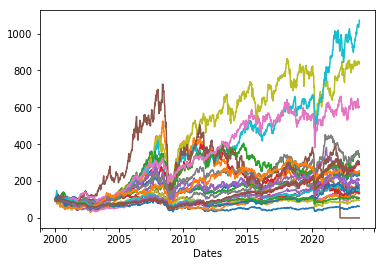

In [11]:
#Plot the stock prices
ax = msci_df.plot.line(legend= False)
#ax.legend(loc = 'upper left')
plt.savefig('MSCIx.png', dpi = 1000)
plt.show()